# Sampling From Groundtruth

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
import bbobtorch
import pyswarms as ps

sys.path.append('../')
from utils.utils import create_problem, plot_ground_truth
from utils.gt_sampling import sample_from_problem_with_pso, random_sample

## Create Groundtruth Functions

In [2]:
n_dim = 2
n_samples = 1000
f_number = 24
seed = 42

In [3]:
problem_1 = create_problem(1, n_dim, seed)
problem_3 = create_problem(3, n_dim, seed)
problem_24 = create_problem(24, n_dim, seed)

c:\Users\User\.conda\envs\MachineLearningProject\lib\site-packages\bbobtorch\utils.py:44: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:2431.)
  R, _ = t.qr(R)


c:\Users\User\.conda\envs\MachineLearningProject\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


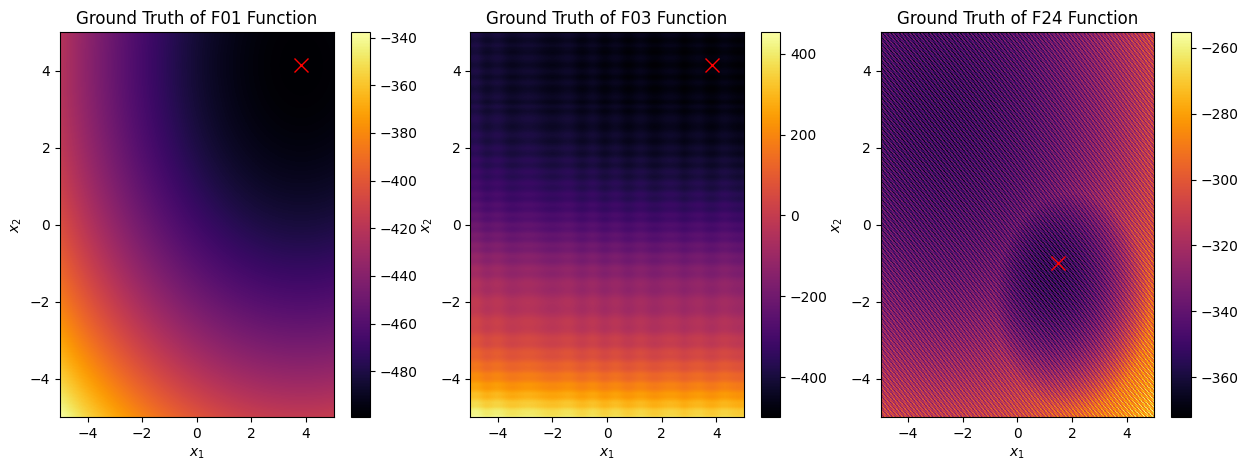

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("f01")
plot_ground_truth(n_dim, problem_1, "F01")
plt.subplot(1,3,2)
plt.title("f03")
plot_ground_truth(n_dim, problem_3, "F03")
plt.subplot(1,3,3)
plt.title("f24")
plot_ground_truth(n_dim, problem_24, "F24")
plt.show()

## Sample From Groundtruth

### Sampling with PSO

In [5]:
samples_1 = sample_from_problem_with_pso(problem_1, n_dim, seed, n_samples=n_samples, particles=20, iters=50, options={'c1': 0.8, 'c2': 0.3, 'w': 0.95})
samples_3 = sample_from_problem_with_pso(problem_3, n_dim, seed, n_samples=n_samples, particles=20, iters=50, options={'c1': 0.8, 'c2': 0.3, 'w': 0.95})
samples_24 = sample_from_problem_with_pso(problem_24, n_dim, seed, n_samples=n_samples, particles=20, iters=50, options={'c1': 0.8, 'c2': 0.3, 'w': 0.95})

In [6]:
def plot_samples(samples, problem, xlim=(-5,5), step=0.01):
    ranges = [torch.arange(xlim[0], xlim[1] + step, step=step) for _ in range(n_dim)]
    meshgrid = torch.meshgrid(*ranges)
    points = torch.stack(meshgrid, dim=-1).view(-1, n_dim)

    results = problem(points)

    grid_size = int((xlim[1] - xlim[0]) / step) + 1
    x = points[:, 0].reshape(grid_size, grid_size)
    y = points[:, 1].reshape(grid_size, grid_size)
    z = results.reshape(grid_size, grid_size)

    # Create a pcolormesh plot
    plt.pcolormesh(x, y, z, cmap='inferno', shading='nearest')
    plt.colorbar()
    plt.plot(problem.x_opt[0], problem.x_opt[1], 'rx', markersize=10, label='x_opt')
    
    plt.scatter(samples[:,0], samples[:,1], marker='.', c='w', s=1)

    plt.xlabel('X')
    plt.ylabel('Y')

    return plt.gca()

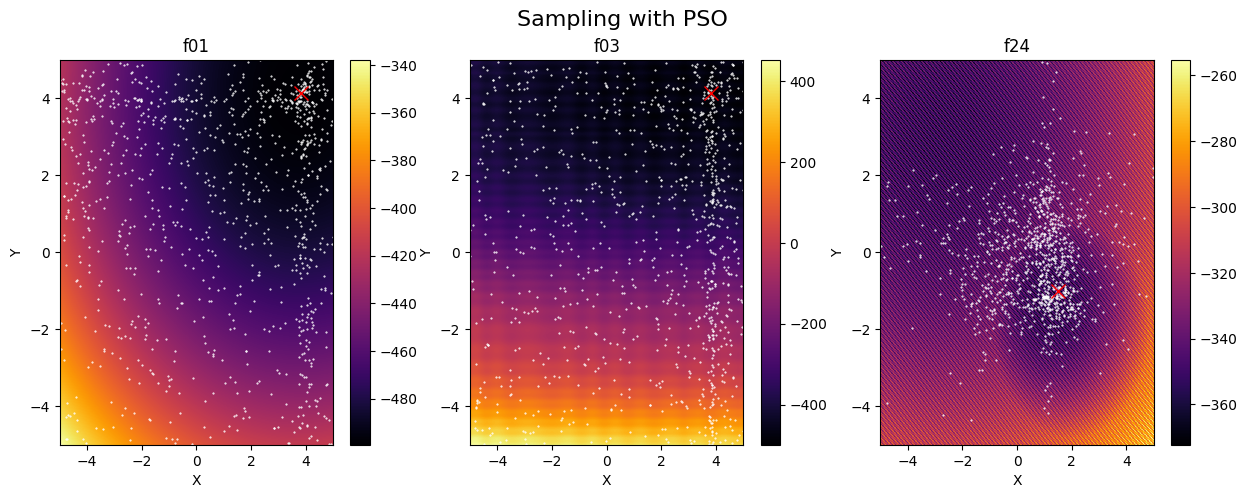

In [7]:
plt.figure(figsize=(15,5))
plt.suptitle("Sampling with PSO", fontsize=16)
plt.subplot(1,3,1)
plt.title("f01")
plot_samples(samples_1, problem_1)
plt.subplot(1,3,2)
plt.title("f03")
plot_samples(samples_3, problem_3)
plt.subplot(1,3,3)
plt.title("f24")
plot_samples(samples_24, problem_24)
plt.show()

### Random Sampling

In [8]:
samples_1_r = random_sample(1000, n_dim, seed)
samples_3_r = random_sample(1000, n_dim, seed)
samples_24_r = random_sample(1000, n_dim, seed)

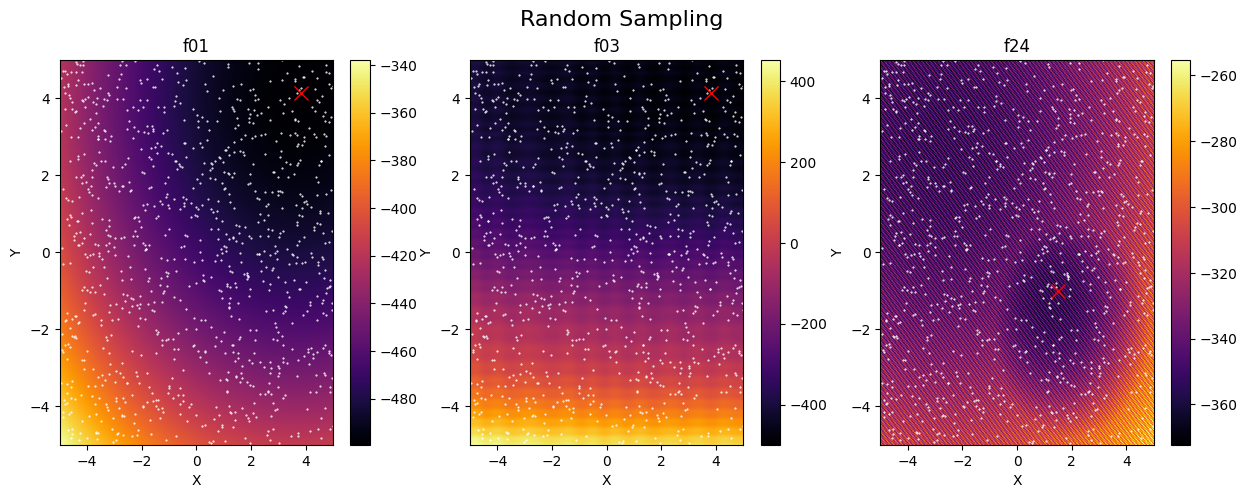

In [9]:
plt.figure(figsize=(15,5))
plt.suptitle("Random Sampling", fontsize=16)
plt.subplot(1,3,1)
plt.title("f01")
plot_samples(samples_1_r, problem_1)
plt.subplot(1,3,2)
plt.title("f03")
plot_samples(samples_3_r, problem_3)
plt.subplot(1,3,3)
plt.title("f24")
plot_samples(samples_24_r, problem_24)
plt.show()

## Conclusion

--> PSO is difficult to parametrize so that the entire function space is covered<br>
--> therefore we use random sampling